In [ ]:
NFA = {
    ('q0', '0') : ['q0'],
    ('q0', '1') : ['q0', 'q1'],
    ('q1', '0') : ['q2'],
    ('q1', '1') : ['q2'],
    ('q2', '0') : ['q3'],
    ('q2', '1') : ['q3'],
    ('q3', '0') : ['q4'],
    ('q3', '1') : ['q4'],
    ('q4', '0') : [],
    ('q4', '1') : []
}

start_state = 'q0'
final_states = ['q4']

In [ ]:
def NFA_To_DFA(NFA, start_state, final_states):
    # Initialize the DFA
    DFA = {}
    DFA_start = frozenset([start_state])
    DFA_accepts = []
    
    # Initialize the new states list with the start state
    new_states = [DFA_start]
    
    # Iterate over the new states and generate the DFA transitions
    for state in new_states:
        # Iterate over the alphabet
        for symbol in set([x[1] for x in NFA.keys()]):
            # Calculate the epsilon closure of the current state
            epsilon_closure = set(state)
            stack = list(epsilon_closure)
            while len(stack) > 0:
                current_state = stack.pop()
                try:
                    epsilon_closure.update(NFA[(current_state, 'E')])
                    for next_state in NFA[(current_state, 'E')]:
                        if next_state not in epsilon_closure:
                            stack.append(next_state)
                except KeyError:
                    pass
            # Calculate the set of states reachable by the current symbol
            reachable_states = set()
            for current_state in epsilon_closure:
                try:
                    reachable_states.update(NFA[(current_state, symbol)])
                except KeyError:
                    pass
            # If the reachable states set is not empty, add a new state to the DFA
            if len(reachable_states) > 0:
                # Calculate the new state
                new_state = frozenset(reachable_states)
                # Add the new state to the DFA
                if new_state not in new_states:
                    new_states.append(new_state)
                # Add the transition to the DFA
                DFA[(state, symbol)] = new_state
    # Update the DFA accept states
    DFA_accepts = [state for state in new_states if len(state.intersection(set(final_states))) > 0]
    
    # Return the DFA transitions, start state, and accept states
    return DFA, DFA_start, DFA_accepts



In [ ]:
dfa_transitions, dfa_start, dfa_accepts = NFA_To_DFA(NFA, start_state, final_states)

print("DFA Transitions:")
for key, value in dfa_transitions.items():
    print(key, "->", value)
print("DFA Start State:", dfa_start)
print("DFA Accept States:", dfa_accepts)

DFA Transitions:
(frozenset({'q0'}), '1') -> frozenset({'q0', 'q1'})
(frozenset({'q0'}), '0') -> frozenset({'q0'})
(frozenset({'q0', 'q1'}), '1') -> frozenset({'q0', 'q2', 'q1'})
(frozenset({'q0', 'q1'}), '0') -> frozenset({'q0', 'q2'})
(frozenset({'q0', 'q2', 'q1'}), '1') -> frozenset({'q0', 'q2', 'q3', 'q1'})
(frozenset({'q0', 'q2', 'q1'}), '0') -> frozenset({'q0', 'q2', 'q3'})
(frozenset({'q0', 'q2'}), '1') -> frozenset({'q0', 'q3', 'q1'})
(frozenset({'q0', 'q2'}), '0') -> frozenset({'q0', 'q3'})
(frozenset({'q0', 'q2', 'q3', 'q1'}), '1') -> frozenset({'q0', 'q4', 'q2', 'q3', 'q1'})
(frozenset({'q0', 'q2', 'q3', 'q1'}), '0') -> frozenset({'q0', 'q4', 'q3', 'q2'})
(frozenset({'q0', 'q2', 'q3'}), '1') -> frozenset({'q0', 'q4', 'q3', 'q1'})
(frozenset({'q0', 'q2', 'q3'}), '0') -> frozenset({'q0', 'q4', 'q3'})
(frozenset({'q0', 'q3', 'q1'}), '1') -> frozenset({'q0', 'q4', 'q2', 'q1'})
(frozenset({'q0', 'q3', 'q1'}), '0') -> frozenset({'q0', 'q4', 'q2'})
(frozenset({'q0', 'q3'}), '1') ->

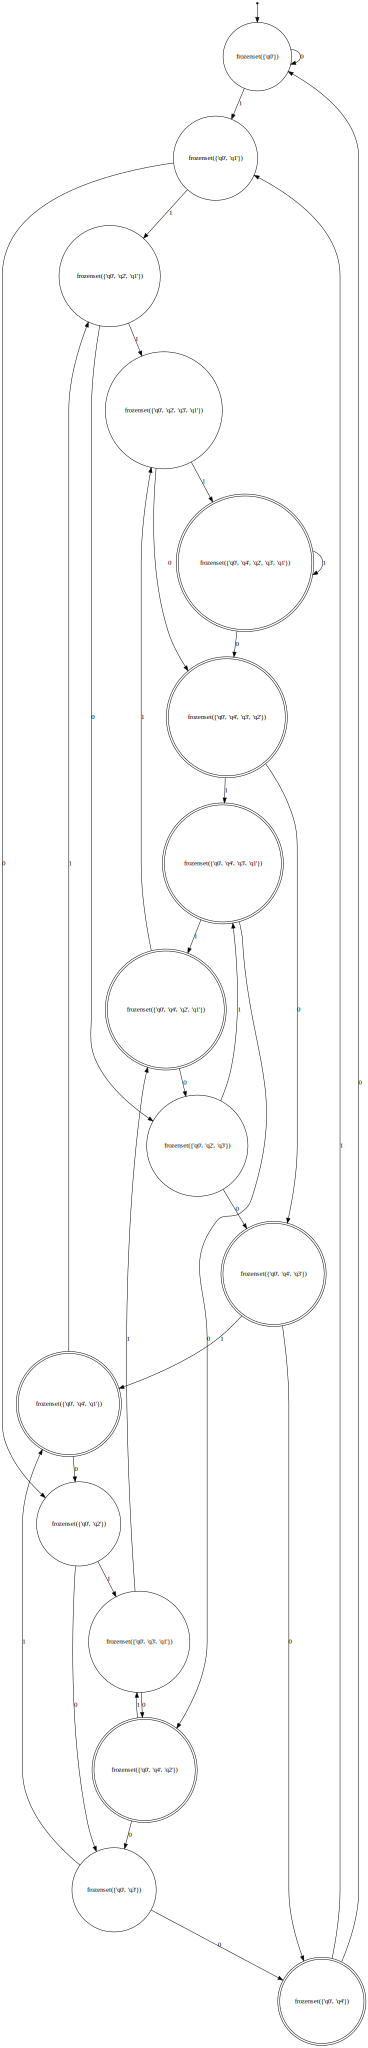

In [ ]:
import graphviz

def draw_dfa(DFA, start_state, final_states):
    dot = graphviz.Digraph()
    for state,_ in DFA.keys():
        if state in final_states:
            dot.node(str(state), shape='doublecircle')
        else:
            dot.node(str(state), shape='circle')
    dot.node(str(),shape='point')
    dot.edge('', str(start_state))
    for state_symbol, next_state in DFA.items():
      dot.edge(str(state_symbol[0]), str(next_state), label=str(state_symbol[1]))
    return dot

dot = draw_dfa(dfa_transitions, dfa_start, dfa_accepts)
dot

In [ ]:
def generate_string_dfa(dfa, start_state, final_states):
    stack = [(start_state, "0")]
    visited = set()
    states = set()
    for state,_ in dfa.keys():
      states.add(state)
    while stack:
        state, string = stack.pop()
        if state in visited:
            continue
        visited.add(state)
        if state in final_states and visited == states:
            return string
        for symbol in ['0', '1']:
            next_state = dfa[(state,symbol)]
            stack.append((next_state, string + symbol))
    return None

string = generate_string_dfa(dfa_transitions, dfa_start, dfa_accepts)
print(string)

0111101100101000
